## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [28]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

# disabling warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

df.dtypes
# All features are of float data types
# class is int

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
# checking for null values
df.isnull().sum()
# there are absolutely no null entries

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# describing dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Checking shape of datafrmae
df.shape

(284807, 31)

Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

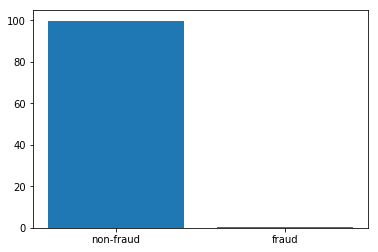

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.bar([0,1],[normal_share,fraud_share],tick_label=["non-fraud","fraud"])
plt.show()
# Below graph shows that it is higly imbalanced data set
# it conatins fraud transactions in very less quantity

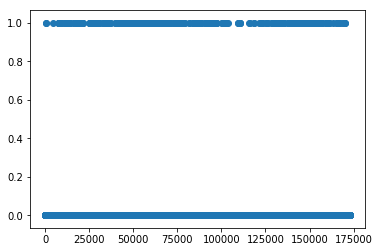

In [10]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df["Time"],df["Class"])
plt.show()

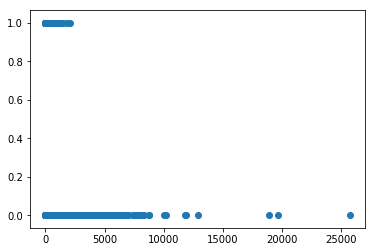

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df["Amount"],df["Class"])
plt.show()
# we see fraud amount is genrally located between 0 and 5000

In [12]:
# Drop unnecessary columns
# We can drop time column as it is just telling order in which transactions took place
df.drop(columns=["Time"],inplace=True)

### Splitting the data into train & test data

In [13]:
# Dividng data to into input X and Output y
X=df.drop(columns=["Class"])
y= df["Class"]#class variable

In [14]:
from sklearn.model_selection import train_test_split

# we need to stratify here so that y_train and y_test has equal ratio of fraud samples
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25,stratify=y)

In [15]:
# fraud ration in train set
print("training set fraud ratio ",(sum(y_train)/len(y_train)))
print("test set fraud ratio ",(sum(y_test)/len(y_test)))

training set fraud ratio  0.0017274876524425926
test set fraud ratio  0.0017274795651807534


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))
# total =492 frauds
# train set=369 frauds
# test set= 123 frauds

492
369
123


### Plotting the distribution of a variable

In [17]:
# checking skewness is there or not
X_train.skew()

V1        -3.314956
V2        -4.744037
V3        -2.285924
V4         0.691400
V5        -2.877451
V6         1.962813
V7         3.325252
V8        -8.689869
V9         0.545185
V10        1.107482
V11        0.363473
V12       -2.328630
V13        0.064537
V14       -1.991184
V15       -0.310135
V16       -1.103301
V17       -3.864212
V18       -0.263168
V19        0.113890
V20       -2.178296
V21        3.558761
V22       -0.224830
V23       -6.405003
V24       -0.550344
V25       -0.419461
V26        0.578140
V27       -0.743545
V28        9.934962
Amount    18.464339
dtype: float64

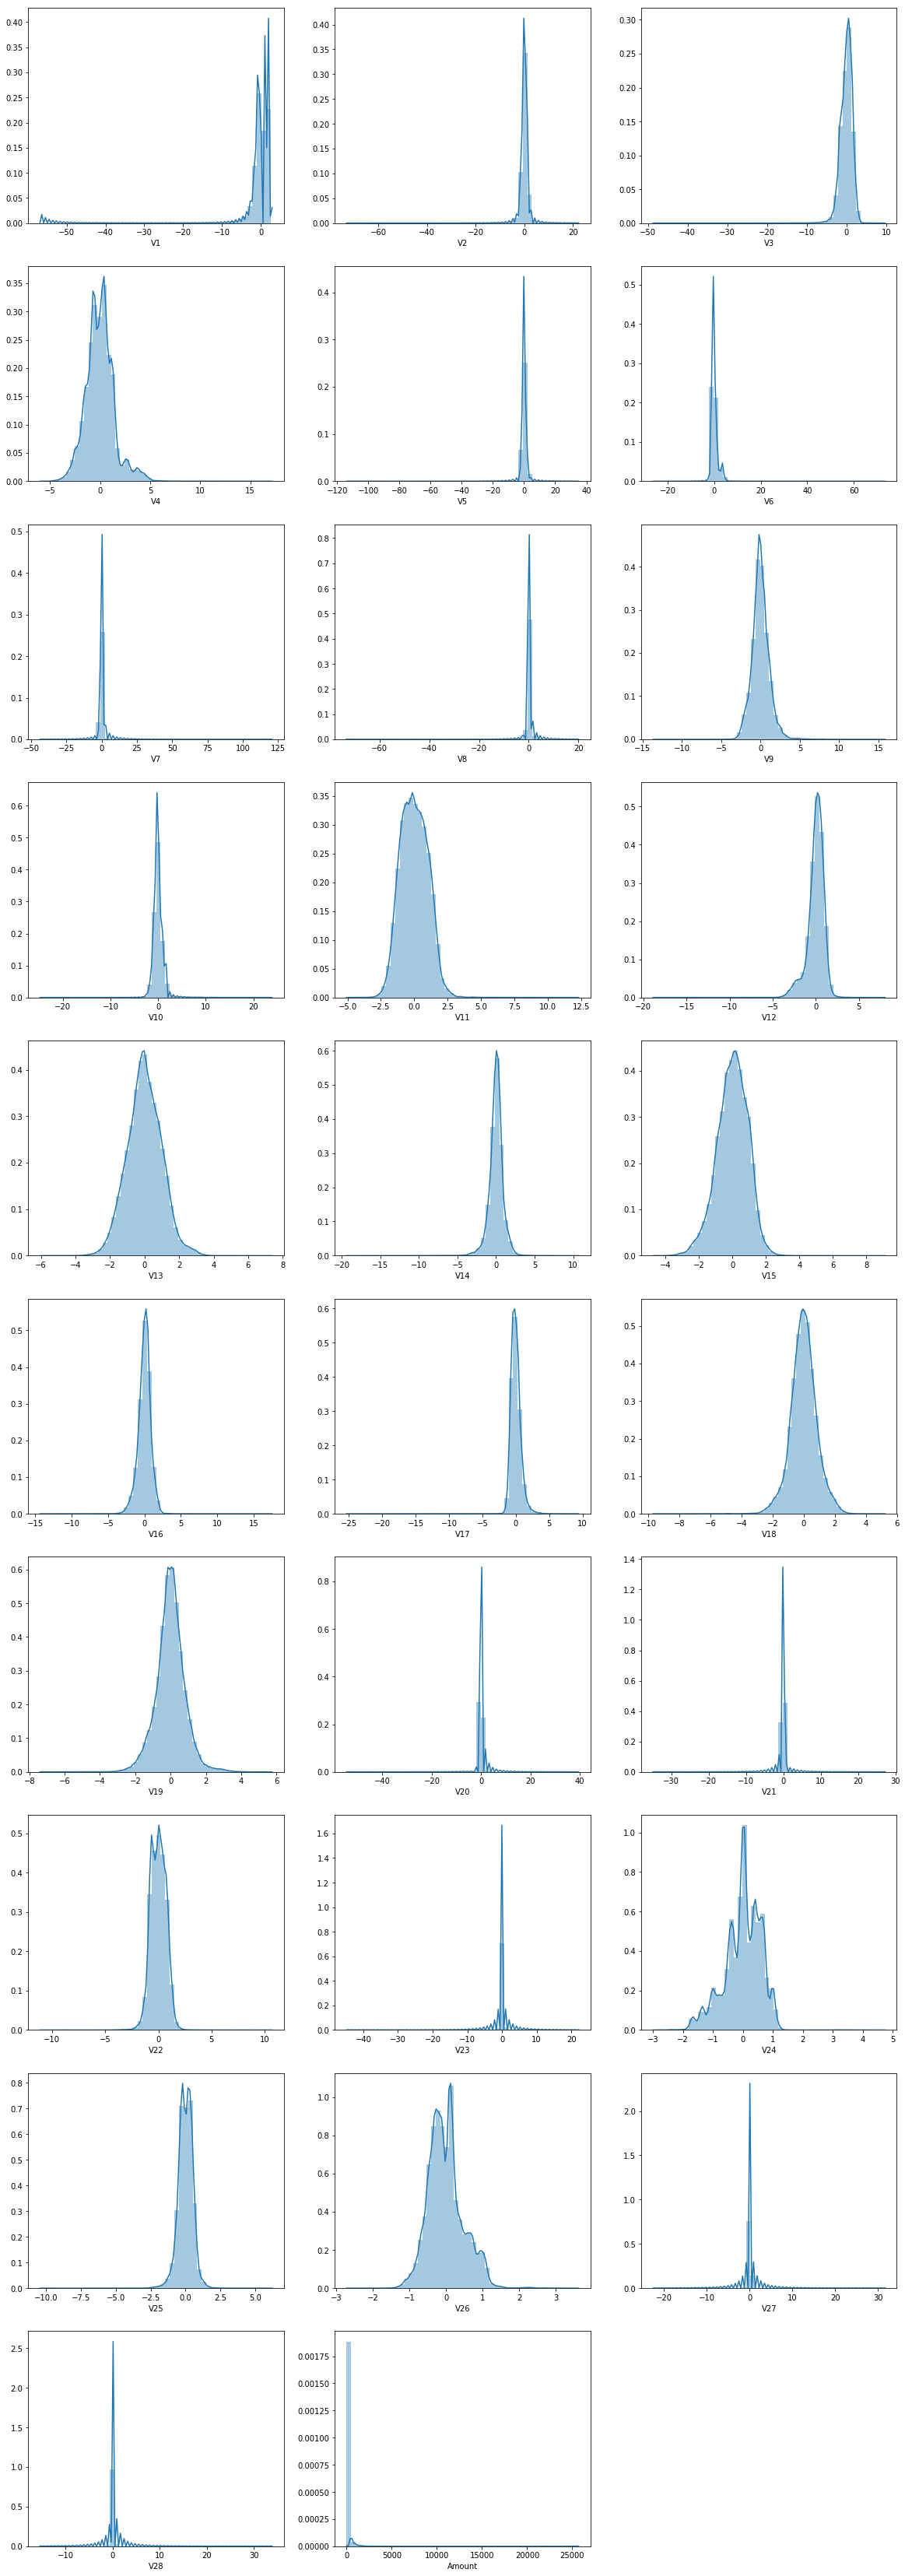

In [18]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(20,60))
i=0
for col in X_train.columns:
    plt.subplot(10,3,i+1)
    sns.distplot(X_train[col])
    i=i+1
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
from sklearn.preprocessing import PowerTransformer
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt=PowerTransformer()
X_train_pt=pt.fit_transform(X_train)

In [20]:
# making dataframe from above numpy array
X_train_pt=pd.DataFrame(X_train_pt,columns=X_train.columns)

In [21]:
# checking skewness again for transformed data
X_train_pt.skew()

V1       -0.217939
V2        0.339373
V3       -0.079501
V4        0.020596
V5       -1.415987
V6       -2.015624
V7        3.059857
V8        2.372059
V9       -0.049578
V10      -1.323086
V11       0.063151
V12       0.164560
V13       0.006450
V14       0.101325
V15       0.014312
V16       0.165071
V17      -0.789553
V18      -0.060091
V19       0.015258
V20      -0.827071
V21      -2.151135
V22      -0.027414
V23      -0.277897
V24       0.111055
V25       0.079449
V26      -0.024530
V27       3.769495
V28       1.281518
Amount    0.018107
dtype: float64

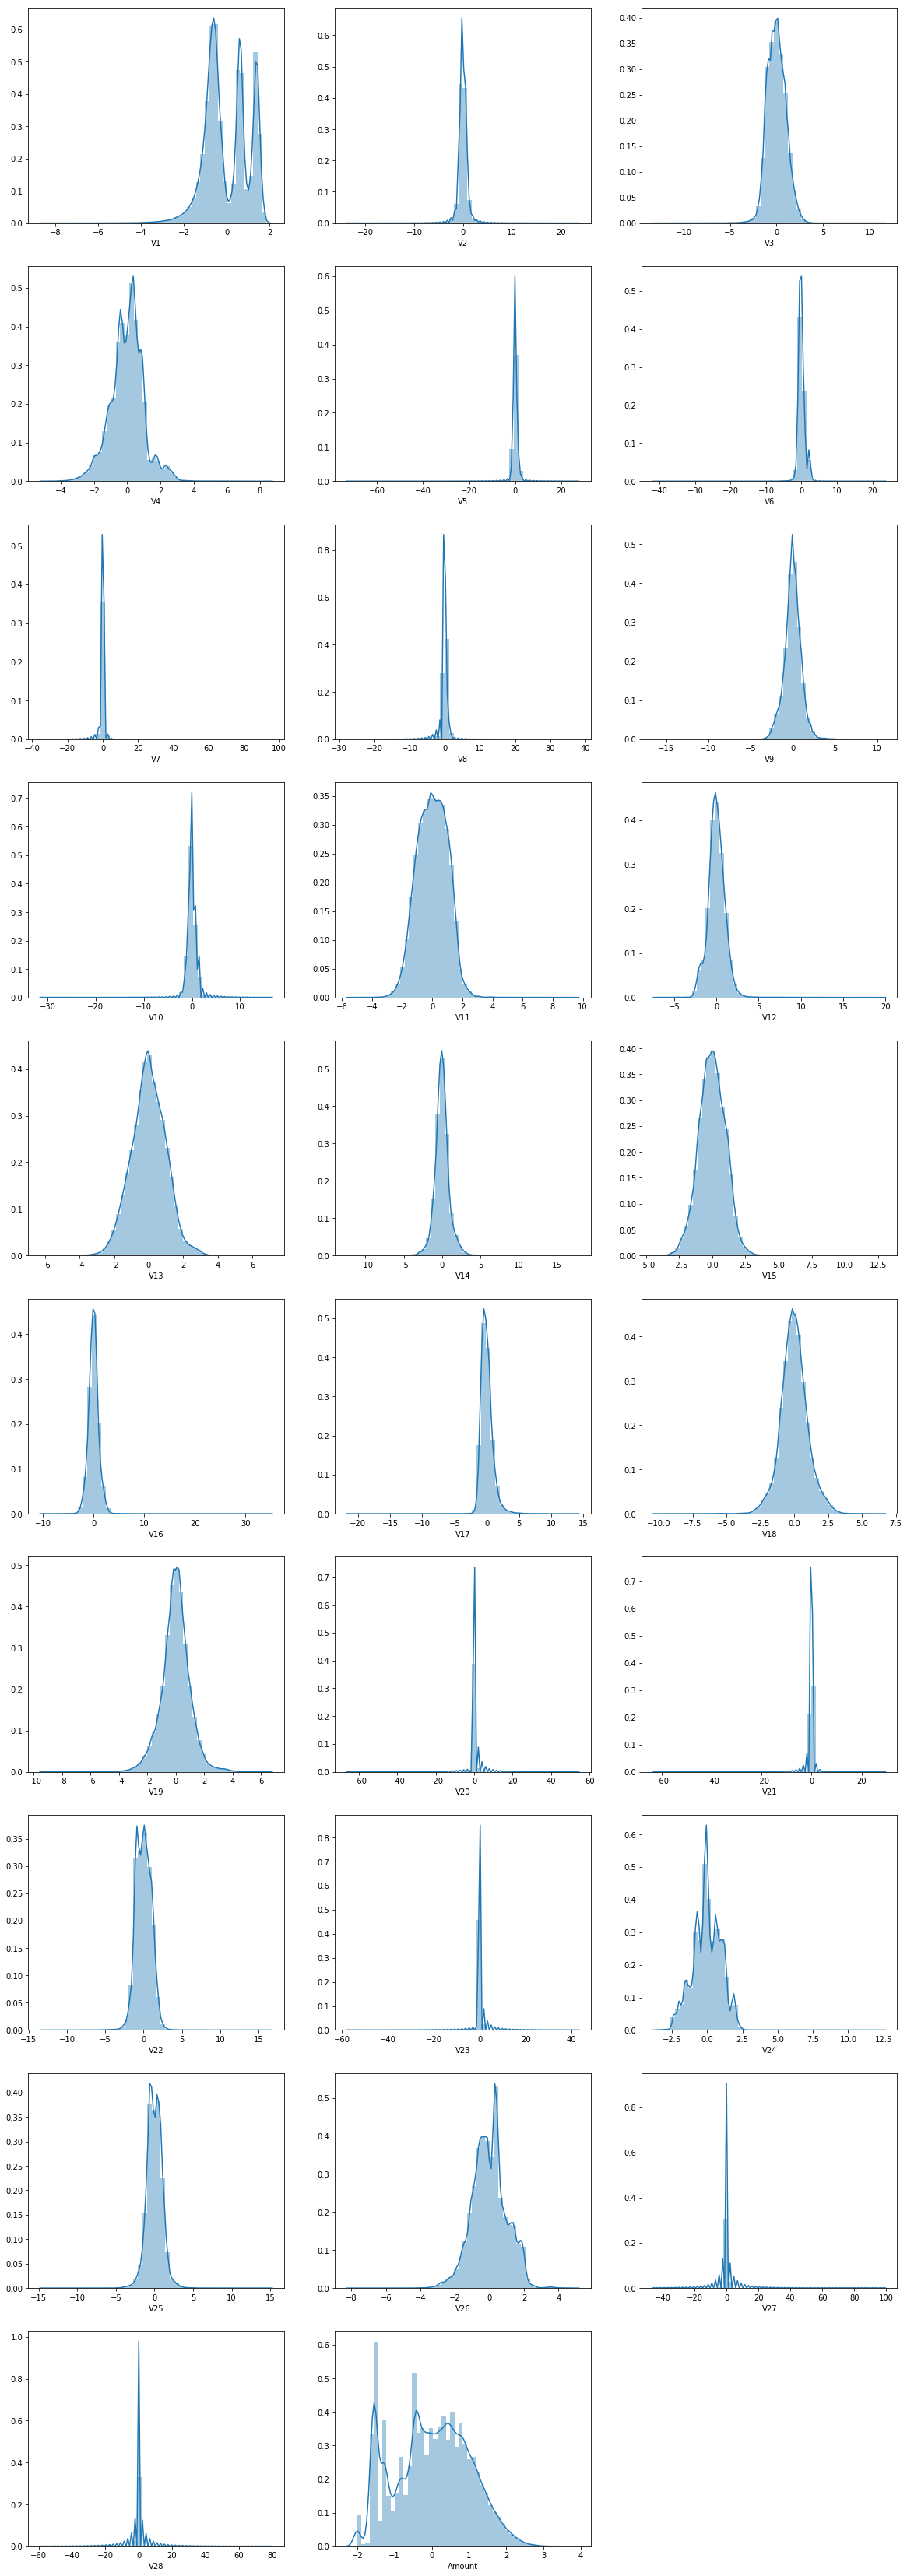

In [22]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20,60))
i=0
for col in X_train_pt.columns:
    plt.subplot(10,3,i+1)
    sns.distplot(X_train_pt[col])
    i=i+1
plt.show()

In [23]:
X_train_pt.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,...,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05
mean,1.320958e-17,-4.303573e-18,-4.082157e-18,1.557057e-17,1.040069e-17,-1.753602e-17,-8.752417e-18,-1.390613e-18,4.009674e-17,-5.909616e-18,...,-8.547634e-18,1.291397e-17,2.852105e-17,5.540070e-18,-1.803758e-17,-1.162796e-17,-1.692739e-17,1.190915e-17,-1.764985e-17,-5.157026e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-8.451390e+00,-2.362792e+01,-1.297912e+01,-5.027685e+00,-7.294108e+01,-4.161359e+01,-3.540274e+01,-2.777654e+01,-1.629456e+01,-3.134627e+01,...,-6.632050e+01,-6.319856e+01,-1.323934e+01,-5.778868e+01,-3.538273e+00,-1.459393e+01,-8.031921e+00,-4.576937e+01,-5.910645e+01,-2.012895e+00
25%,-7.228795e-01,-4.544006e-01,-7.125782e-01,-5.680087e-01,-5.086635e-01,-5.561389e-01,-4.448335e-01,-2.757245e-01,-5.601890e-01,-4.745600e-01,...,-2.774224e-01,-3.023640e-01,-7.554508e-01,-2.741651e-01,-6.601499e-01,-6.335133e-01,-6.495506e-01,-1.863533e-01,-1.558498e-01,-7.483765e-01
50%,-2.489609e-01,-4.216979e-02,-2.467226e-02,6.315739e-02,-5.200648e-02,-1.160564e-01,3.403496e-02,-5.508110e-02,5.337657e-03,-4.719640e-02,...,-8.389665e-02,-2.360168e-02,-1.277785e-02,-3.029459e-02,-2.924300e-02,-6.642827e-03,-1.758952e-02,-7.530537e-03,4.427598e-02,2.570196e-02
75%,7.353880e-01,4.771202e-01,6.738437e-01,5.832089e-01,4.344080e-01,4.097243e-01,4.605788e-01,2.578697e-01,5.828590e-01,4.555898e-01,...,1.703774e-01,2.730537e-01,7.198473e-01,2.287683e-01,7.060909e-01,6.582605e-01,5.779201e-01,2.165503e-01,2.515023e-01,7.498692e-01
max,1.865474e+00,2.354038e+01,1.146207e+01,8.518131e+00,2.747190e+01,2.354317e+01,9.590432e+01,3.802278e+01,1.078604e+01,1.649085e+01,...,5.444852e+01,2.955059e+01,1.650989e+01,4.310372e+01,1.237988e+01,1.501492e+01,4.934777e+00,9.949150e+01,8.010336e+01,3.681963e+00


In [24]:
# applying fitted power transformer on test data
X_test_pt=pt.transform(X_test)

In [25]:
X_test_pt=pd.DataFrame(X_test_pt,columns=X_test.columns)
X_test_pt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.244541,4.051384,-0.068870,-1.687073,0.187044,-0.342895,1.998793,-1.663278,5.102592,8.409306,...,6.017868,-2.419473,-1.334081,-0.238265,-0.373679,2.046678,-0.133551,3.657020,-1.123907,-0.491684
1,1.285025,0.262725,-0.600329,2.375475,0.205338,-0.218065,0.209224,-0.265821,-0.884660,1.356705,...,-0.330761,0.435610,1.254633,-0.023795,-0.009917,0.309887,0.530019,-0.118049,-0.141622,0.146121
2,-0.837750,0.840295,0.858475,1.018379,0.039404,-0.462529,1.654025,-0.471014,-1.482739,0.132699,...,-0.530072,0.069934,0.185714,-0.131078,1.246800,0.859571,-0.164791,-0.273286,0.012937,1.148748
3,-1.419180,-1.091305,0.994947,1.846046,0.651617,0.345261,-0.550240,1.069869,-1.366210,0.190773,...,1.224043,0.946936,0.889259,0.672109,-0.581085,-0.779029,0.350623,0.000125,-0.871300,1.332065
4,-0.602273,0.530730,-0.243109,0.031855,1.528670,2.456453,-0.279608,1.538792,-0.431730,-0.552380,...,0.035717,-0.196843,-0.793972,-0.115966,1.861517,-0.044677,-1.011304,0.093630,0.225344,-0.154057


## Model Building
- Build different models on the imbalanced dataset and see the result

In [26]:
# making function which will print performance data for both train and test data basis inputs
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
def performance_data(model,input_data,output_data,data_type):
    if data_type=="train":
        print("================Train Reseults================")
        print()
        print(classification_report(output_data,model.predict(input_data)))
        print()
        print("ROC Auc Score ",roc_auc_score(output_data,model.predict_proba(input_data)[:,1]))
    else:
        print("================Test Reseults================")
        print()
        print(classification_report(output_data,model.predict(input_data)))
        print()
        print("ROC Auc Score ",roc_auc_score(output_data,model.predict_proba(input_data)[:,1]))        

### logistic regression

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(X_train_pt,y_train)

LogisticRegression(random_state=42)

================Train Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.90      0.66      0.76       369

    accuracy                           1.00    213605
   macro avg       0.95      0.83      0.88    213605
weighted avg       1.00      1.00      1.00    213605


ROC Auc Score  0.9846172448293355


#### Train Results

In [29]:
performance_data(lr,X_train_pt,y_train,"train")

================Train Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.90      0.66      0.76       369

    accuracy                           1.00    213605
   macro avg       0.95      0.83      0.88    213605
weighted avg       1.00      1.00      1.00    213605


ROC Auc Score  0.9846172448293355


#### Test Results

In [31]:
performance_data(lr,X_test_pt,y_test,"test")
# recall on catching actual frauds is just 67 which is too low

================Test Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.66      0.74       123

    accuracy                           1.00     71202
   macro avg       0.92      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202


ROC Auc Score  0.9684665533609289


In [ ]:
# lets do hyperparameter tuning using grid search
# Grid search uses stratified KFOLD so that equal proportion of all classes is maintained
from sklearn.model_selection import GridSearchCV
params ={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],'penalty':['l1','l2']}
lr=LogisticRegression()
grid=GridSearchCV(estimator=lr,param_grid=params,n_jobs=-1,cv=5,scoring='roc_auc',verbose=1)
grid.fit(X_train_pt,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="mean_test_score",ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.579885,0.105565,0.029143,0.000528,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.993176,0.970807,0.993055,0.968043,0.982276,0.981472,0.010638,1
3,1.585464,0.079275,0.028236,0.000895,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.992318,0.970129,0.992459,0.967841,0.982232,0.980996,0.010510,2
5,1.680326,0.043817,0.028798,0.001775,1,l2,"{'C': 1, 'penalty': 'l2'}",0.992167,0.970022,0.992370,0.967777,0.982218,0.980911,0.010496,3
7,1.683268,0.014492,0.029454,0.001342,2,l2,"{'C': 2, 'penalty': 'l2'}",0.992085,0.969962,0.992324,0.967725,0.982206,0.980860,0.010493,4
9,1.654901,0.058121,0.028063,0.000782,3,l2,"{'C': 3, 'penalty': 'l2'}",0.992058,0.969941,0.992301,0.967709,0.982202,0.980842,0.010490,5
11,1.658224,0.037503,0.029268,0.000903,4,l2,"{'C': 4, 'penalty': 'l2'}",0.992040,0.969932,0.992295,0.967695,0.982199,0.980832,0.010491,6
13,1.710209,0.091017,0.028646,0.000859,5,l2,"{'C': 5, 'penalty': 'l2'}",0.992029,0.969925,0.992287,0.967692,0.982199,0.980827,0.010489,7
15,1.696520,0.116051,0.025987,0.003876,10,l2,"{'C': 10, 'penalty': 'l2'}",0.992014,0.969908,0.992278,0.967686,0.982197,0.980817,0.010489,8
0,0.042400,0.011667,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.032283,0.007272,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [ ]:
# best parameters
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [32]:
# making model with best parametes
lr_best=LogisticRegression(C=0.1,penalty='l2')
lr_best.fit(X_train_pt,y_train)

LogisticRegression(C=0.1)

#### Train Results after hyperparameter tuning

In [33]:
performance_data(lr_best,X_train_pt,y_train,"train")

================Train Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.90      0.66      0.76       369

    accuracy                           1.00    213605
   macro avg       0.95      0.83      0.88    213605
weighted avg       1.00      1.00      1.00    213605


ROC Auc Score  0.984947870779051


#### Test Results after after hyperparameter tuning

In [34]:
performance_data(lr_best,X_test_pt,y_test,"test")

================Test Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.66      0.74       123

    accuracy                           1.00     71202
   macro avg       0.92      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202


ROC Auc Score  0.9695722736993545


- Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(random_state=42)
rc.fit(X_train_pt,y_train)

RandomForestClassifier(random_state=42)

#### Train Results

In [36]:
performance_data(rc,X_train_pt,y_train,"train")

================Train Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00       369

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605


ROC Auc Score  1.0


#### Test Results

In [37]:
performance_data(rc,X_test_pt,y_test,"test")
# we see recall has improved

================Test Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.93      0.79      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202


ROC Auc Score  0.9332765775216103


In [ ]:
#Lets do Randomized search cv for hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'max_depth': [10,50,100],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [5,10, 50],
               'n_estimators': [50,100,150]}
rc=RandomForestClassifier()
random_grid = RandomizedSearchCV(estimator = rc, param_distributions = random_grid, n_iter = 8, cv = 5, verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')
random_grid.fit(X_train_pt,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=8,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 50],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
pd.DataFrame(random_grid.cv_results_).sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,63.437616,0.673886,0.229372,0.010396,50,10,sqrt,10,"{'n_estimators': 50, 'min_samples_leaf': 10, '...",0.995237,0.973654,0.989863,0.957803,0.980689,0.979449,0.013125,1
6,191.261455,2.470649,0.669349,0.013409,150,50,sqrt,10,"{'n_estimators': 150, 'min_samples_leaf': 50, ...",0.993651,0.974199,0.989145,0.962364,0.976703,0.979212,0.011157,2
5,186.439019,1.315288,0.638975,0.022624,150,10,auto,10,"{'n_estimators': 150, 'min_samples_leaf': 10, ...",0.987781,0.970268,0.990925,0.958507,0.979986,0.977493,0.011876,3
4,268.587147,8.005377,0.785822,0.027544,150,50,auto,100,"{'n_estimators': 150, 'min_samples_leaf': 50, ...",0.993892,0.981825,0.975098,0.951711,0.976806,0.975866,0.013751,4
7,182.250906,12.487819,0.540971,0.054554,100,50,sqrt,100,"{'n_estimators': 100, 'min_samples_leaf': 50, ...",0.991076,0.969088,0.982054,0.943100,0.975306,0.972125,0.016245,5
1,191.565477,5.612596,0.553142,0.033103,100,10,sqrt,100,"{'n_estimators': 100, 'min_samples_leaf': 10, ...",0.982583,0.966862,0.982449,0.950972,0.968579,0.970289,0.011720,6
2,93.771094,4.734399,0.279072,0.010730,50,10,sqrt,100,"{'n_estimators': 50, 'min_samples_leaf': 10, '...",0.975662,0.969362,0.968057,0.946282,0.961162,0.964105,0.010031,7
0,194.937558,6.292063,0.585149,0.023817,100,5,auto,50,"{'n_estimators': 100, 'min_samples_leaf': 5, '...",0.976769,0.955605,0.962723,0.926843,0.962455,0.956879,0.016521,8


In [ ]:
#best parameters
random_grid.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'n_estimators': 50}

In [38]:
# buliding best model
rc_best=RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=10,n_estimators=50,random_state=42,n_jobs=-1)
rc_best.fit(X_train_pt,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=50, n_jobs=-1, random_state=42)

#### Train Results after hyperparameter tuning

In [39]:
performance_data(rc_best,X_train_pt,y_train,"train")

================Train Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.94      0.78      0.86       369

    accuracy                           1.00    213605
   macro avg       0.97      0.89      0.93    213605
weighted avg       1.00      1.00      1.00    213605


ROC Auc Score  0.9930605406806287


#### Test Results after hyper parameter tuning

In [40]:
performance_data(rc_best,X_test_pt,y_test,"test")

================Test Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.74      0.82       123

    accuracy                           1.00     71202
   macro avg       0.95      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202


ROC Auc Score  0.974552018554415


### XGBOOST

In [41]:
# importing library
import xgboost as xgb

In [42]:
xgbc=xgb.XGBClassifier(random_state=42)
xgbc.fit(X_train_pt,y_train)

[13:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Train Results

In [44]:
performance_data(xgbc,X_test_pt,y_test,"test")

================Test Reseults================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.77      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202


ROC Auc Score  0.9768049223141959


In [ ]:
performance_data(xgbc,X_train_pt,y_train,"train")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.98      0.85      0.91       369

    accuracy                           1.00    213605
   macro avg       0.99      0.92      0.95    213605
weighted avg       1.00      1.00      1.00    213605



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train,xgbc.predict_proba(X_train_pt)[:,1]))

0.9967359345506265


#### Test Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,xgbc.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.92      0.77      0.84       123

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#roc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,xgbc.predict_proba(X_test_pt)[:,1]))

0.9701776919005843


In [158]:
# Lets do randomized grid search
# Hyper Parameter tuning using grid search for XG boost
from sklearn.model_selection import GridSearchCV
params = {
        'model__learning_rate': [0.01,0.1,0.5],
        'model__subsample': [0.6, 0.8, 1.0],
        "model__n_estimators": [50,100, 200],
        }
grid=GridSearchCV(estimator=xgb.XGBClassifier(random_state=42),param_grid=params,scoring='roc_auc',n_jobs=-1,verbose=1,cv=5)
grid.fit(X_train_pt,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[20:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "model__learning_rate", "model__n_estimators", "model__subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [159]:
# sorting results by mean test score
pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__n_estimators,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,198.324015,6.907725,0.248004,0.033866,0.01,50,0.6,"{'model__learning_rate': 0.01, 'model__n_estim...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1
14,356.281098,5.881108,0.409081,0.062252,0.1,100,1,"{'model__learning_rate': 0.1, 'model__n_estima...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1
25,283.957754,5.064227,0.355736,0.043543,0.5,200,0.8,"{'model__learning_rate': 0.5, 'model__n_estima...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1
24,280.581196,6.771562,0.377509,0.025551,0.5,200,0.6,"{'model__learning_rate': 0.5, 'model__n_estima...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1
23,281.768127,6.526415,0.366758,0.056289,0.5,100,1,"{'model__learning_rate': 0.5, 'model__n_estima...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1
22,280.372807,5.183190,0.392274,0.033592,0.5,100,0.8,"{'model__learning_rate': 0.5, 'model__n_estima...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1
21,281.723288,6.591985,0.335441,0.034681,0.5,100,0.6,"{'model__learning_rate': 0.5, 'model__n_estima...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1
20,271.576706,9.152029,0.307405,0.069042,0.5,50,1,"{'model__learning_rate': 0.5, 'model__n_estima...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1
19,281.997081,6.088838,0.359600,0.041659,0.5,50,0.8,"{'model__learning_rate': 0.5, 'model__n_estima...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1
18,285.947122,7.415569,0.361392,0.034183,0.5,50,0.6,"{'model__learning_rate': 0.5, 'model__n_estima...",0.993962,0.969342,0.988276,0.963938,0.979855,0.979075,0.011232,1


In [160]:
# best parameters
grid.best_params_

{'model__learning_rate': 0.01,
 'model__n_estimators': 50,
 'model__subsample': 0.6}

In [161]:
# building best model
xgbc_best=xgb.XGBClassifier(random_state=42,learning_rate=0.01,n_estimators=50,subsample=0.6)
xgbc_best.fit(X_train_pt,y_train)

[20:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Train Results after hyper parameter tuning

In [162]:
print(classification_report(y_train,xgbc_best.predict(X_train_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.97      0.82      0.89       369

    accuracy                           1.00    213605
   macro avg       0.99      0.91      0.94    213605
weighted avg       1.00      1.00      1.00    213605



In [163]:
#roc score
print(roc_auc_score(y_train,xgbc_best.predict_proba(X_train_pt)[:,1]))

0.9226308080297408


### Test Results after hyper parameter tuning

In [164]:
print(classification_report(y_test,xgbc_best.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.79      0.83       123

    accuracy                           1.00     71202
   macro avg       0.94      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [165]:
#roc score
print(roc_auc_score(y_test,xgbc_best.predict_proba(X_test_pt)[:,1]))

0.9225905974081057


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
clf=rc_best

Top var = 14
2nd Top var = 17
3rd Top var = 12


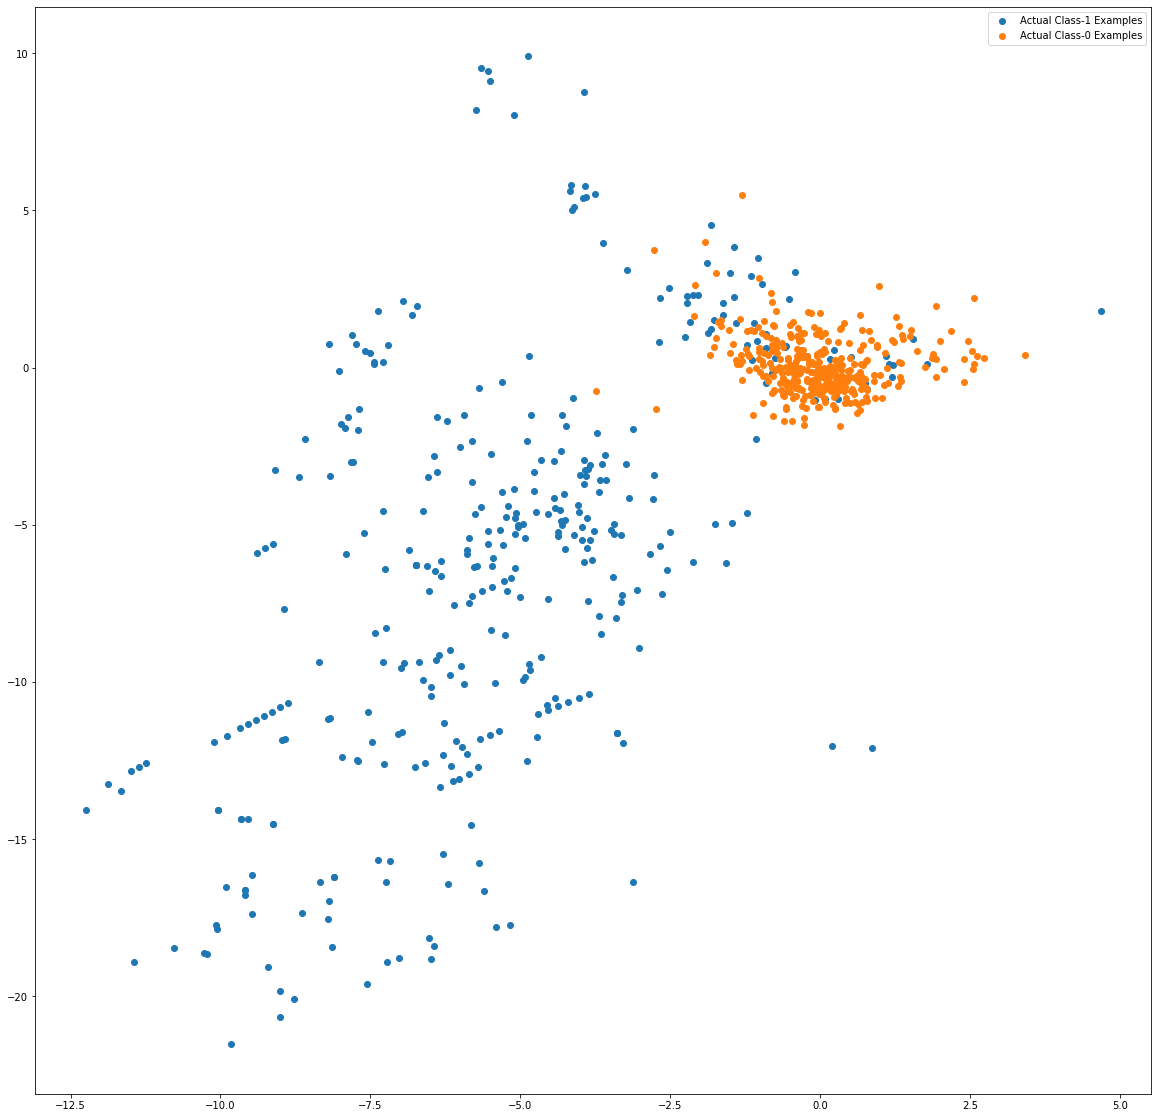

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building using Random oversampling
- Build different models on the balanced dataset and see the result

### Logistic Regression

In [ ]:
# for random over sampling
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_pt_over, y_train_over = oversample.fit_resample(X_train_pt, y_train)

In [ ]:
# Building Logitic Regression model
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(X_train_pt_over,y_train_over)

LogisticRegression(random_state=42)

#### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_over,lr.predict(X_train_pt_over)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    213236
           1       0.97      0.93      0.95    213236

    accuracy                           0.95    426472
   macro avg       0.95      0.95      0.95    426472
weighted avg       0.95      0.95      0.95    426472



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_over,lr.predict_proba(X_train_pt_over)[:,1]))

0.9892476795642084


#### Test Results

In [ ]:
# classification report
print(classification_report(y_test,lr.predict(X_test_pt)))
# we see after random oversampling recall is high but precison is too low
# threshoding needs to done to reach optimal values

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202



In [ ]:
# roc score
print(roc_auc_score(y_test,lr.predict_proba(X_test_pt)[:,1]))
# Balancing improved roc auc score of model

0.974463430533094


### Random Forest Classifier

In [ ]:
# Building random forest classifier
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(random_state=42,n_jobs=-1)
rc.fit(X_train_pt_over,y_train_over)

RandomForestClassifier(n_jobs=-1, random_state=42)

#### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_over,rc.predict(X_train_pt_over)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_over,rc.predict_proba(X_train_pt_over)[:,1]))

1.0


#### Test Results

In [ ]:
# classification report
print(classification_report(y_test,rc.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.97      0.76      0.85       123

    accuracy                           1.00     71202
   macro avg       0.98      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# roc score
print(roc_auc_score(y_test,rc.predict_proba(X_test_pt)[:,1]))

0.949659585229626


### XG BOOST

In [ ]:
# building XG BOOST classifier
xgbc=xgb.XGBClassifier(random_state=42)
xgbc.fit(X_train_pt_over,y_train_over)

XGBClassifier(random_state=42)

#### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_over,xgbc.predict(X_train_pt_over)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_over,xgbc.predict_proba(X_train_pt_over)[:,1]))

0.9997520748135288


#### Test Results

In [ ]:
# classification report
print(classification_report(y_test,xgbc.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.23      0.88      0.37       123

    accuracy                           0.99     71202
   macro avg       0.62      0.94      0.68     71202
weighted avg       1.00      0.99      1.00     71202



In [ ]:
# roc score
print(roc_auc_score(y_test,xgbc.predict_proba(X_test_pt)[:,1]))

0.9790323763196269


## SMOTE OVERSAMPLING

### Print the class distribution after applying SMOTE 

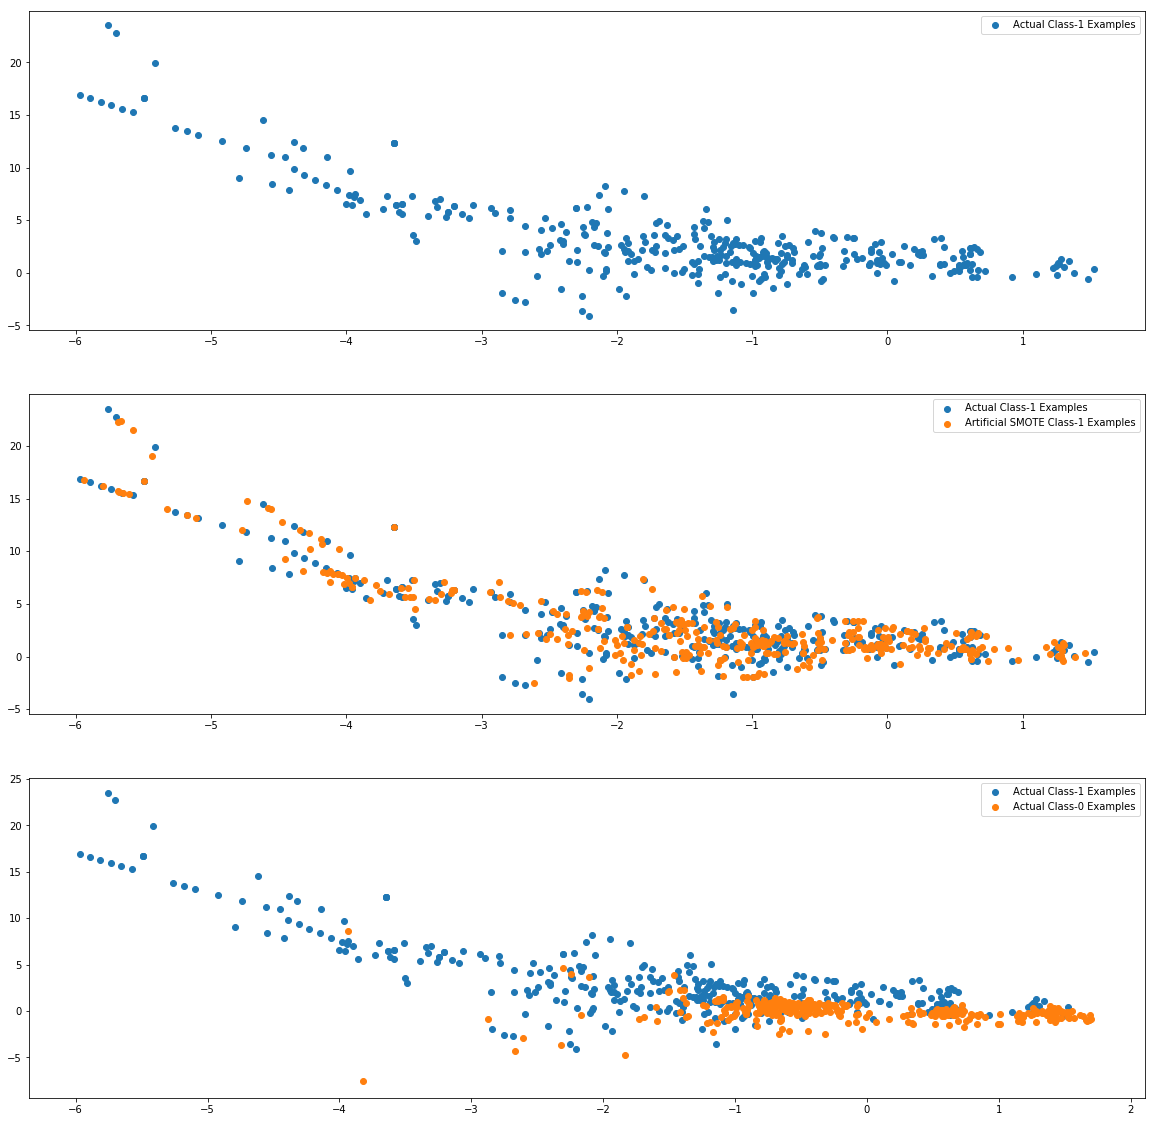

In [47]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train_pt.shape[0]:]

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.to_numpy()[:X_train_1.shape[0], 0], X_train_smote_1.to_numpy()[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_pt_smote, y_train_pt_smote = sm.fit_resample(X_train_pt, y_train)

### Logistic Regression

In [ ]:
#building Logistic Regression
lr=LogisticRegression(random_state=42)
lr.fit(X_train_pt_smote,y_train_pt_smote)

LogisticRegression(random_state=42)

#### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_pt_smote,lr.predict(X_train_pt_smote)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    213236
           1       0.97      0.93      0.95    213236

    accuracy                           0.95    426472
   macro avg       0.95      0.95      0.95    426472
weighted avg       0.95      0.95      0.95    426472



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_pt_smote,lr.predict_proba(X_train_pt_smote)[:,1]))

0.9910796600679463


#### Test Results

In [ ]:
# classification report
print(classification_report(y_test,lr.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.05      0.89      0.10       123

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.54     71202
weighted avg       1.00      0.97      0.98     71202



In [ ]:
# roc score
print(roc_auc_score(y_test,lr.predict_proba(X_test_pt)[:,1]))

0.9736192993551089


### Random Forest

In [ ]:
rc= RandomForestClassifier(n_jobs=-1,random_state=42)
rc.fit(X_train_pt_smote,y_train_pt_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)

#### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_pt_smote,rc.predict(X_train_pt_smote)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_pt_smote,rc.predict_proba(X_train_pt_smote)[:,1]))

1.0


#### Test Results

In [ ]:
# classification report
print(classification_report(y_test,rc.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.80      0.84       123

    accuracy                           1.00     71202
   macro avg       0.94      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# roc score
print(roc_auc_score(y_test,rc.predict_proba(X_test_pt)[:,1]))

0.9772493493727409


### XG BOOST

In [ ]:
# building XG BOOST classifier
xgbc=xgb.XGBClassifier(random_state=42)
xgbc.fit(X_train_pt_smote,y_train_pt_smote)

XGBClassifier(random_state=42)

#### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_pt_smote,xgbc.predict(X_train_pt_smote)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    213236
           1       0.99      0.97      0.98    213236

    accuracy                           0.98    426472
   macro avg       0.98      0.98      0.98    426472
weighted avg       0.98      0.98      0.98    426472



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_pt_smote,xgbc.predict_proba(X_train_pt_smote)[:,1]))

0.9987631782933967


#### Test Results

In [ ]:
# classification report
print(classification_report(y_test,xgbc.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.11      0.88      0.20       123

    accuracy                           0.99     71202
   macro avg       0.56      0.93      0.60     71202
weighted avg       1.00      0.99      0.99     71202



In [ ]:
# roc score
print(roc_auc_score(y_test,xgbc.predict_proba(X_test_pt)[:,1]))

0.9792255656908488


- XG BOOST with SMOTE oversampling has by far seen highest ROC auc score
- We will perform hyperparameter tuning to get optimal set of parameters

# ADASIN

### Print the class distribution after applying ADASYN

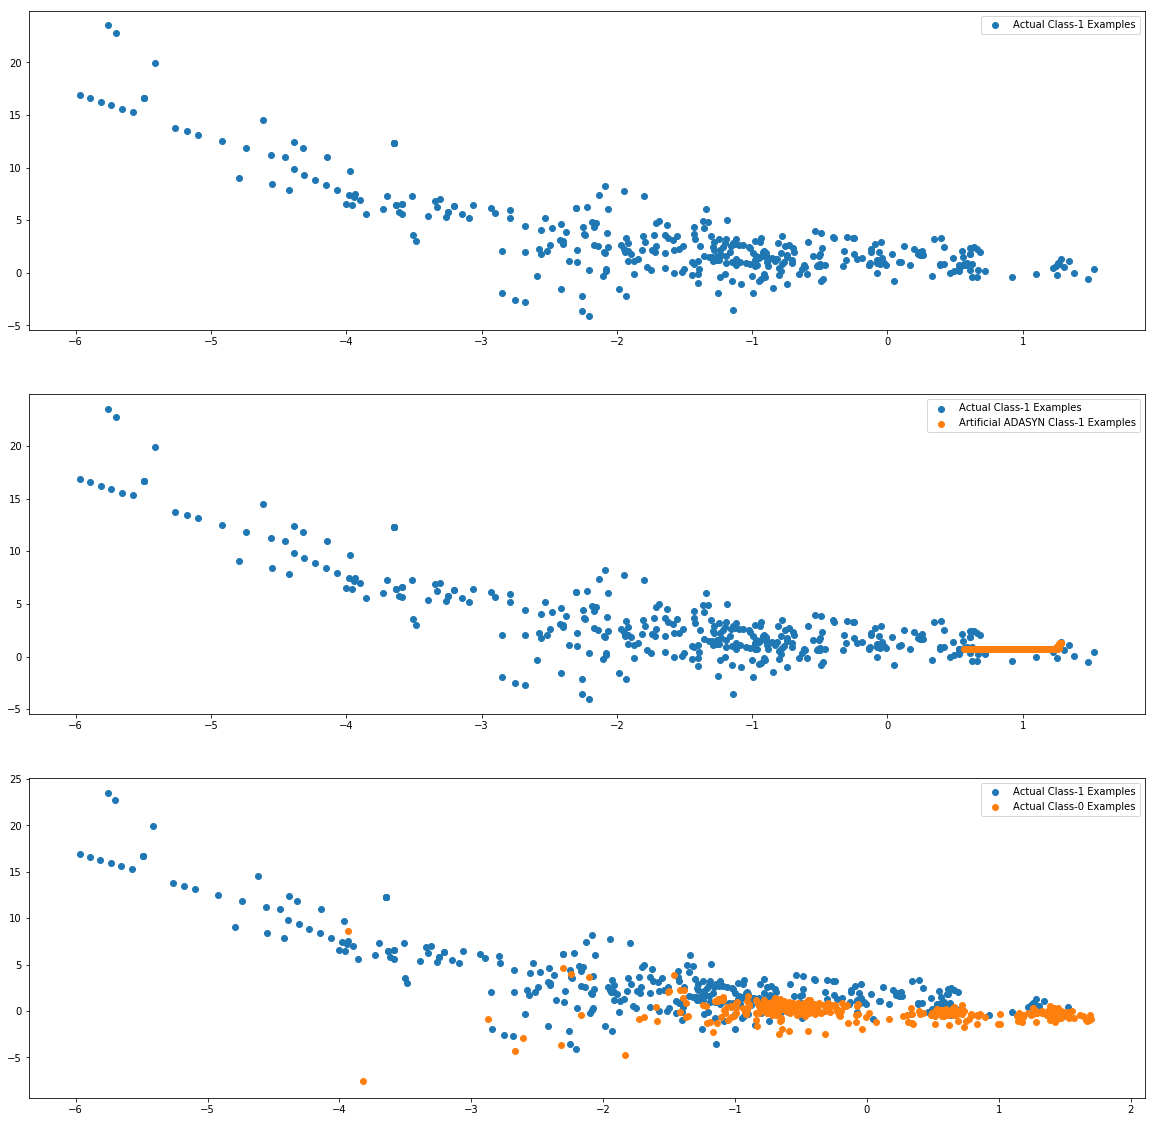

In [48]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn.to_numpy()[X_train_pt.shape[0]:]

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# oversampling using ADASIN
from imblearn.over_sampling import ADASYN
ad = ADASYN(random_state=0)
X_train_pt_adasyn, y_train_pt_adasyn = ad.fit_resample(X_train_pt, y_train)

### Logistic Regression

In [ ]:
#building Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(X_train_pt_adasyn,y_train_pt_adasyn)

LogisticRegression(random_state=42)

#### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_pt_adasyn,lr.predict(X_train_pt_adasyn)))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91    213236
           1       0.92      0.89      0.90    213245

    accuracy                           0.91    426481
   macro avg       0.91      0.91      0.91    426481
weighted avg       0.91      0.91      0.91    426481



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_pt_adasyn,lr.predict_proba(X_train_pt_adasyn)[:,1]))

0.968598231337588


#### Test Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,lr.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     71079
           1       0.02      0.91      0.04       123

    accuracy                           0.92     71202
   macro avg       0.51      0.91      0.50     71202
weighted avg       1.00      0.92      0.95     71202



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,lr.predict_proba(X_test_pt)[:,1]))

0.9748352828988974


### Random forest

In [ ]:
# building random forest classifier
rc=RandomForestClassifier(random_state=42,n_jobs=-1)
rc.fit(X_train_pt_adasyn,y_train_pt_adasyn)

RandomForestClassifier(n_jobs=-1, random_state=42)

#### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_pt_adasyn,rc.predict(X_train_pt_adasyn)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213245

    accuracy                           1.00    426481
   macro avg       1.00      1.00      1.00    426481
weighted avg       1.00      1.00      1.00    426481



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_pt_adasyn,rc.predict_proba(X_train_pt_adasyn)[:,1]))

1.0


#### Test Results

In [ ]:
# classification report
print(classification_report(y_test,rc.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.77      0.83       123

    accuracy                           1.00     71202
   macro avg       0.95      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# roc auc score
print(roc_auc_score(y_test,rc.predict_proba(X_test_pt)[:,1]))

0.9619762940971326


### XG Boost

In [ ]:
# building XG BOOST classifier
import xgboost as xgb
xgbc=xgb.XGBClassifier(random_state=42,n_jobs=-1)
xgbc.fit(X_train_pt_adasyn,y_train_pt_adasyn)

XGBClassifier(n_jobs=-1, random_state=42)

#### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_pt_adasyn,xgbc.predict(X_train_pt_adasyn)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    213236
           1       0.97      0.99      0.98    213245

    accuracy                           0.98    426481
   macro avg       0.98      0.98      0.98    426481
weighted avg       0.98      0.98      0.98    426481



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_pt_adasyn,xgbc.predict_proba(X_train_pt_adasyn)[:,1]))

0.9965495077209753


#### Test Results

In [ ]:
# classification report
print(classification_report(y_test,xgbc.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.90      0.08       123

    accuracy                           0.96     71202
   macro avg       0.52      0.93      0.53     71202
weighted avg       1.00      0.96      0.98     71202



In [ ]:
# roc auc score
print(roc_auc_score(y_test,xgbc.predict_proba(X_test_pt)[:,1]))

0.9790694357371971


# Hyper Parameter tuning with oversampling

## XG BOOSTS

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import xgboost as xgb

pipe = Pipeline(
    [('resample', SMOTE(random_state=0)),('model', xgb.XGBClassifier())]
)

In [ ]:
# Hyper Parameter tuning using grid search for XG boost
from sklearn.model_selection import RandomizedSearchCV
params = {
        'model__learning_rate': [0.01,0.1,0.5],
        'model__subsample': [0.6, 0.8, 1.0],
        "model__n_estimators": [50,100, 200],
        }
random_grid=RandomizedSearchCV(estimator=pipe,param_distributions=params,scoring='roc_auc',n_jobs=-1,verbose=1,cv=3,n_iter=8)
random_grid.fit(X_train_pt,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('resample',
                                              SMOTE(random_state=0)),
                                             ('model', XGBClassifier())]),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.1,
                                                                 0.5],
                                        'model__n_estimators': [50, 100, 200],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=1)

In [ ]:
pd.DataFrame(random_grid.cv_results_).sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,66.296074,2.324156,0.222217,0.030685,0.8,50,0.1,"{'model__subsample': 0.8, 'model__n_estimators...",0.987637,0.975849,0.979152,0.980879,0.004965,1
0,73.338640,0.423227,0.223895,0.010234,1,50,0.1,"{'model__subsample': 1.0, 'model__n_estimators...",0.988243,0.975702,0.977554,0.980500,0.005527,2
5,285.713633,1.643678,0.546944,0.011513,1,200,0.01,"{'model__subsample': 1.0, 'model__n_estimators...",0.986783,0.976196,0.976879,0.979953,0.004838,3
4,283.344977,1.452122,0.742654,0.014515,1,200,0.1,"{'model__subsample': 1.0, 'model__n_estimators...",0.988633,0.962361,0.979043,0.976679,0.010855,4
6,122.992406,1.169298,0.442275,0.005669,0.6,100,0.5,"{'model__subsample': 0.6, 'model__n_estimators...",0.984657,0.959669,0.977719,0.974015,0.010532,5
1,273.047128,1.694961,0.750414,0.002694,1,200,0.5,"{'model__subsample': 1.0, 'model__n_estimators...",0.983214,0.963254,0.972671,0.973046,0.008153,6
2,72.075344,0.327562,0.197988,0.014431,1,50,0.01,"{'model__subsample': 1.0, 'model__n_estimators...",0.979314,0.964572,0.970185,0.971357,0.006075,7
3,63.150975,1.047403,0.197522,0.013719,0.6,50,0.01,"{'model__subsample': 0.6, 'model__n_estimators...",0.978122,0.965420,0.969968,0.971170,0.005255,8


In [ ]:
# best parameters
random_grid.best_params_

{'model__learning_rate': 0.1,
 'model__n_estimators': 50,
 'model__subsample': 0.8}

In [ ]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_pt_smote, y_train_pt_smote = sm.fit_resample(X_train_pt, y_train)

In [ ]:
# building best model
xgbc_best=xgb.XGBClassifier(random_state=42,learning_rate=0.1,n_estimators=50,subsample=0.8)
xgbc_best.fit(X_train_pt_smote,y_train_pt_smote)

XGBClassifier(n_estimators=50, random_state=42, subsample=0.8)

### Train Results

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_pt_smote,xgbc_best.predict(X_train_pt_smote)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    213236
           1       0.98      0.94      0.96    213236

    accuracy                           0.96    426472
   macro avg       0.96      0.96      0.96    426472
weighted avg       0.96      0.96      0.96    426472



In [ ]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_pt_smote,xgbc_best.predict_proba(X_train_pt_smote)[:,1]))

0.9958315802181115


### Test Results

In [ ]:
# classification report
print(classification_report(y_test,xgbc_best.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.89      0.15       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



In [ ]:
# roc auc score
print(roc_auc_score(y_test,xgbc_best.predict_proba(X_test_pt)[:,1]))

0.9722798988003386


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
#Lets do Randomized search cv for hyper parameter tuning
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
random_rf_grid = {'model__max_depth': [10,50,100],
               'model__max_features': ['auto', 'sqrt'],
               'model__min_samples_leaf': [5,10, 50],
               'model__n_estimators': [50,100,150]}
pipe = Pipeline(
    [('resample', SMOTE(random_state=0)),('model', RandomForestClassifier())]
)
random_rf_grid = RandomizedSearchCV(estimator = pipe, param_distributions = random_rf_grid, n_iter = 8, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='f1')
random_rf_grid.fit(X_train_pt,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('resample',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'model__max_depth': [10, 50, 100],
                                        'model__max_features': ['auto', 'sqrt'],
                                        'model__min_samples_leaf': [5, 10, 50],
                                        'model__n_estimators': [50, 100, 150]},
                   random_state=42, scoring='f1', verbose=2)

In [29]:
pd.DataFrame(random_rf_grid.cv_results_).sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,451.791282,13.292165,1.962550,0.188690,100,5,auto,50,"{'model__n_estimators': 100, 'model__min_sampl...",0.826446,0.792308,0.836066,0.818273,0.018776,1
2,196.435640,7.964358,0.744242,0.033879,50,10,sqrt,100,"{'model__n_estimators': 50, 'model__min_sample...",0.798419,0.765799,0.806202,0.790140,0.017502,2
1,413.407386,41.866872,1.555987,0.179368,100,10,sqrt,100,"{'model__n_estimators': 100, 'model__min_sampl...",0.793651,0.761905,0.801556,0.785704,0.017135,3
7,374.799552,14.478766,1.411237,0.150259,100,50,sqrt,100,"{'model__n_estimators': 100, 'model__min_sampl...",0.721649,0.670846,0.684211,0.692235,0.021503,4
4,553.713501,19.382892,2.155122,0.076957,150,50,auto,100,"{'model__n_estimators': 150, 'model__min_sampl...",0.747331,0.646526,0.668831,0.687563,0.043233,5
3,154.666474,3.539178,0.803093,0.105285,50,10,sqrt,10,"{'model__n_estimators': 50, 'model__min_sample...",0.641745,0.566138,0.651899,0.619927,0.038260,6
5,452.353522,3.361406,2.054770,0.113409,150,10,auto,10,"{'model__n_estimators': 150, 'model__min_sampl...",0.649682,0.541667,0.658147,0.616498,0.053027,7
6,451.190555,4.991907,1.959961,0.143537,150,50,sqrt,10,"{'model__n_estimators': 150, 'model__min_sampl...",0.616279,0.500000,0.621701,0.579327,0.056136,8


In [30]:
# best parameters
random_rf_grid.best_params_

{'model__n_estimators': 100,
 'model__min_samples_leaf': 5,
 'model__max_features': 'auto',
 'model__max_depth': 50}

In [31]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_pt_smote, y_train_pt_smote = sm.fit_resample(X_train_pt, y_train)

In [32]:
rf_best=RandomForestClassifier(random_state=42,max_depth=50,max_features='auto',min_samples_leaf=5,n_estimators=100)
rf_best.fit(X_train_pt_smote,y_train_pt_smote)

RandomForestClassifier(max_depth=50, min_samples_leaf=5, random_state=42)

### Train Results after hyperparameter tuning

In [33]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_pt_smote,rf_best.predict(X_train_pt_smote)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [34]:
# roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_pt_smote,rf_best.predict_proba(X_train_pt_smote)[:,1]))

0.9999999836814017


### Test Results after hyper parameter tuning

In [35]:
# classification report
print(classification_report(y_test,rf_best.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.78      0.82      0.80       123

    accuracy                           1.00     71202
   macro avg       0.89      0.91      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [36]:
# roc auc score
print(roc_auc_score(y_test,rf_best.predict_proba(X_test_pt)[:,1]))

0.9730017567765261


# Analysis from above model buidling experiments

### No sampling
- Here random forest and xgboost perfomed are showing best results
- Random forest with defualt hyperparameters over fit
- Random forest after hyperparameter tuning is giving similar results on both train and test data.
- XG boost with default hyperparamets is having f1 score greater than random forest
- f1 score we are checking as since it is imbalance class problem so checking precison and recall for fraud prediction is important

### Over Sampling
- we performed random ,smote and adsyn oversampling techniques
- Precison of predicting fraud dropped to very low value for XGBOOST & LOGISTIC REGRESSION whcich means model is getting confused with these over sampling techniques
- Random forest is giving f1 socre of around 0.82-0.84 on test but no significant increase because of sampling

### Conclusion
- XGBOOST & RANDOM FOREST(after applying hyperparameter tuning) with no sampling techniques are preforming well
- These Models are having very less overfitting when compared to other models

### Print the important features of the best model to understand the dataset

In [ ]:
clf=xgbc_best

Top var = 14
2nd Top var = 10
3rd Top var = 4


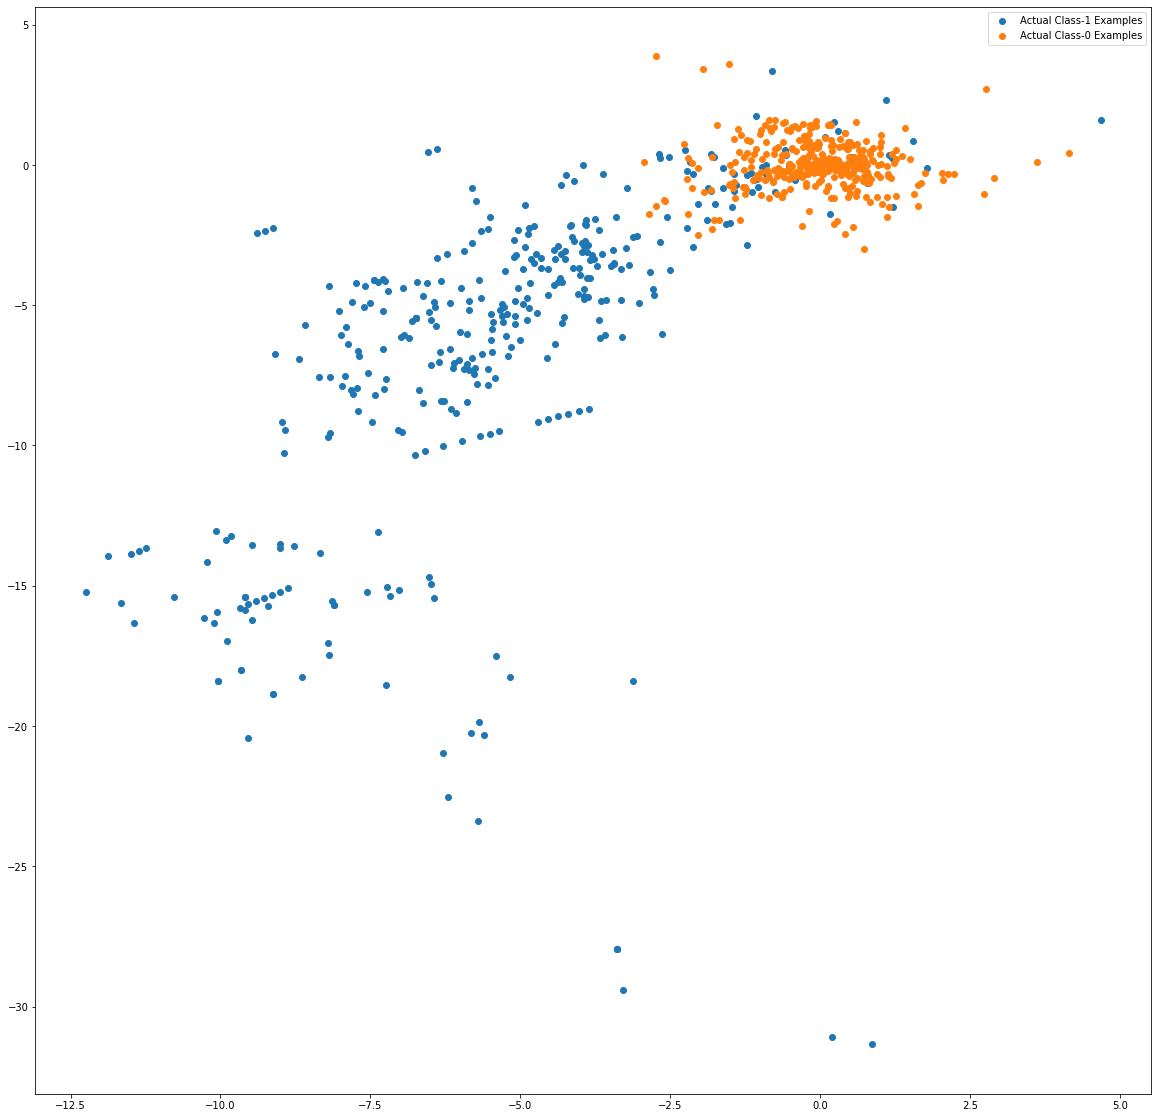

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Print the FPR,TPR & select the best threshold from the roc curve

### RANDOM FOREST

In [25]:
# buliding final model
# no sampling
# keeping class weight as balanced
from sklearn.ensemble import RandomForestClassifier
rc_final=RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=10,n_estimators=50,random_state=42,n_jobs=-1,class_weight='balanced')
rc_final.fit(X_train_pt,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_leaf=10,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [26]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=10,n_estimators=50,random_state=42,n_jobs=-1,class_weight='balanced'), X_train_pt,y_train, cv=3,scoring='f1'))

[0.81666667 0.83127572 0.82113821]


In [135]:
# threshold at which difference between tpr and fpr is maximum
from sklearn.metrics import roc_auc_score
print('Train auc =', metrics.roc_auc_score(y_train,rc_final.predict_proba(X_train_pt)[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train,rc_final.predict_proba(X_train_pt)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999332520665806
0.36402580949892105


In [136]:
# prediction probablities on train data
y_train_pred_probs=rc_final.predict_proba(X_train_pt)[:,1]
prediction_train=pd.DataFrame(y_train_pred_probs,columns=["pred_probs"])
prediction_train.head()

,pred_probs
0,0.006799
1,0.003909
2,0.002931
3,0.018304
4,0.002680


In [137]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds=precision_recall_curve(y_train,prediction_train.pred_probs)

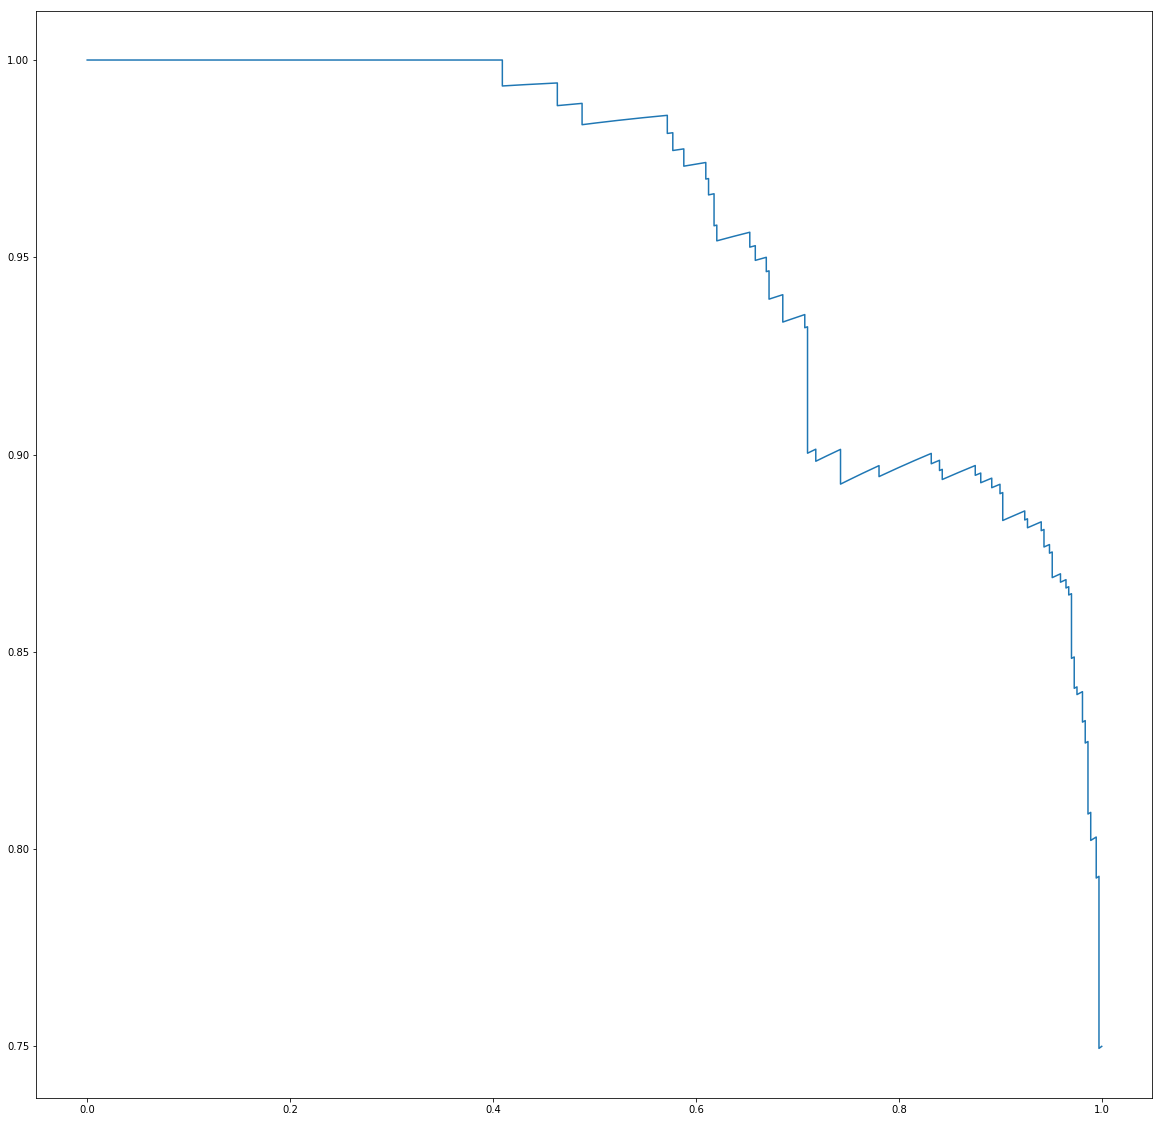

Area under precsion recall curve  0.9583592805336111


In [138]:
plt.plot(recall,precision)
plt.show()
print("Area under precsion recall curve ",auc(recall,precision))

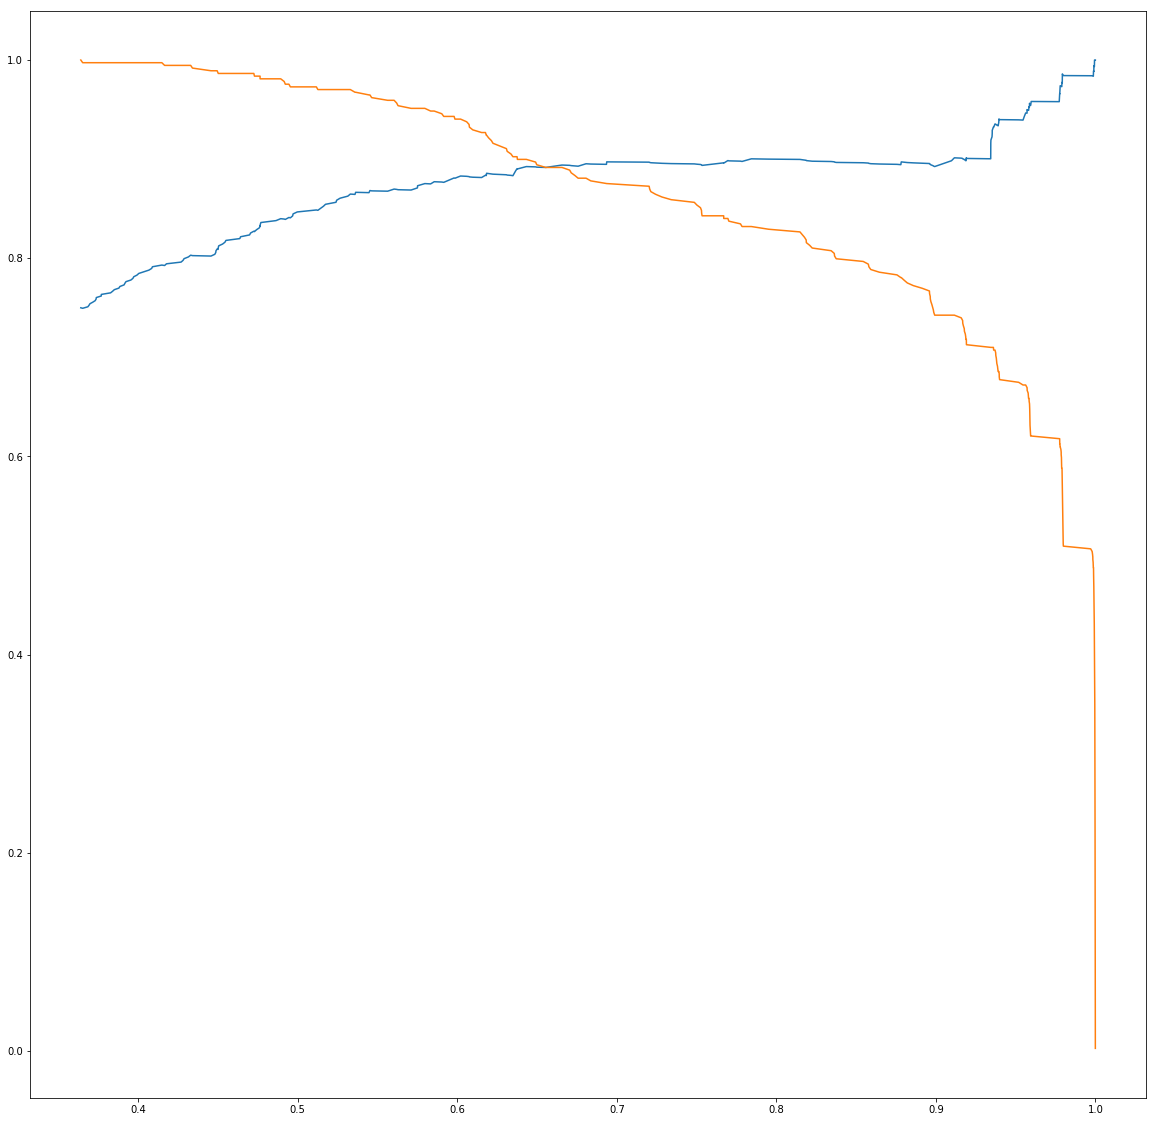

In [139]:
plt.plot(thresholds,precision[:-1])
plt.plot(thresholds,recall[:-1])
plt.show()

- Basis above curve optima threshold is 0.65
- How ever as intention is to detect fraudlent more and keeping decent precison lets set threhold to 0.55

In [140]:
# Test data prediction probablities
y_test_pred_probs=rc_final.predict_proba(X_test_pt)[:,1]

In [141]:
prediction=pd.DataFrame(y_test_pred_probs,columns=["pred_probs"])
prediction.head()

,pred_probs
0,0.000366
1,0.045975
2,0.023771
3,0.005355
4,0.007073


In [148]:
# using threshold 0.55 as decided above
prediction["class_predicted"]=prediction["pred_probs"].apply(lambda x: 1 if x> 0.55 else 0)

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction["class_predicted"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.81      0.80      0.80       123

    accuracy                           1.00     71202
   macro avg       0.90      0.90      0.90     71202
weighted avg       1.00      1.00      1.00     71202



# XG BOOST

In [166]:
# importing library
import xgboost as xgb
# building best model
xgbc_final=xgb.XGBClassifier(random_state=42,learning_rate=0.01,n_estimators=50,subsample=0.6)
xgbc_final.fit(X_train_pt,y_train)

[21:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [167]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(xgb.XGBClassifier(random_state=42,learning_rate=0.01,n_estimators=50,subsample=0.6), X_train_pt,y_train, cv=3,scoring='f1'))

[21:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.84716157 0.81938326 0.83261803]


In [168]:
# threshold at which difference between tpr and fpr is maximum
from sklearn.metrics import roc_auc_score
print('Train auc =', metrics.roc_auc_score(y_train,xgbc_final.predict_proba(X_train_pt)[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train,xgbc_final.predict_proba(X_train_pt)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9226308080297408
0.3209512


In [169]:
# prediction probablities on train data
y_train_pred_probs=xgbc_final.predict_proba(X_train_pt)[:,1]
prediction_train=pd.DataFrame(y_train_pred_probs,columns=["pred_probs"])
prediction_train.head()

,pred_probs
0,0.302875
1,0.302875
2,0.302875
3,0.302875
4,0.302875


In [170]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds=precision_recall_curve(y_train,prediction_train.pred_probs)

In [171]:
from sklearn.metrics import auc
print(auc(recall,precision))

0.8779118273774154


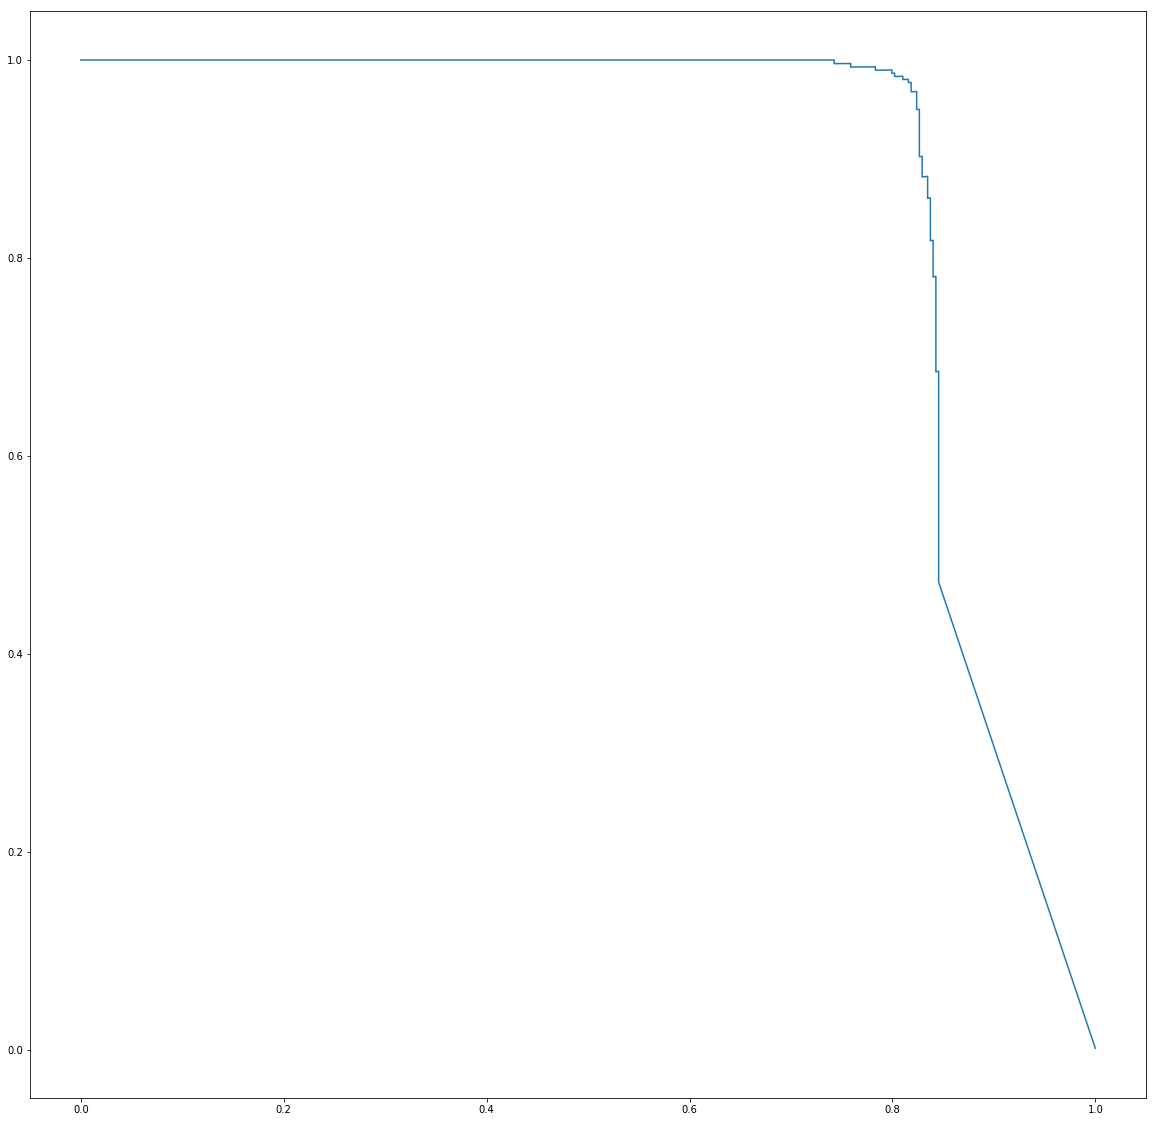

In [172]:
plt.plot(recall,precision)
plt.show()

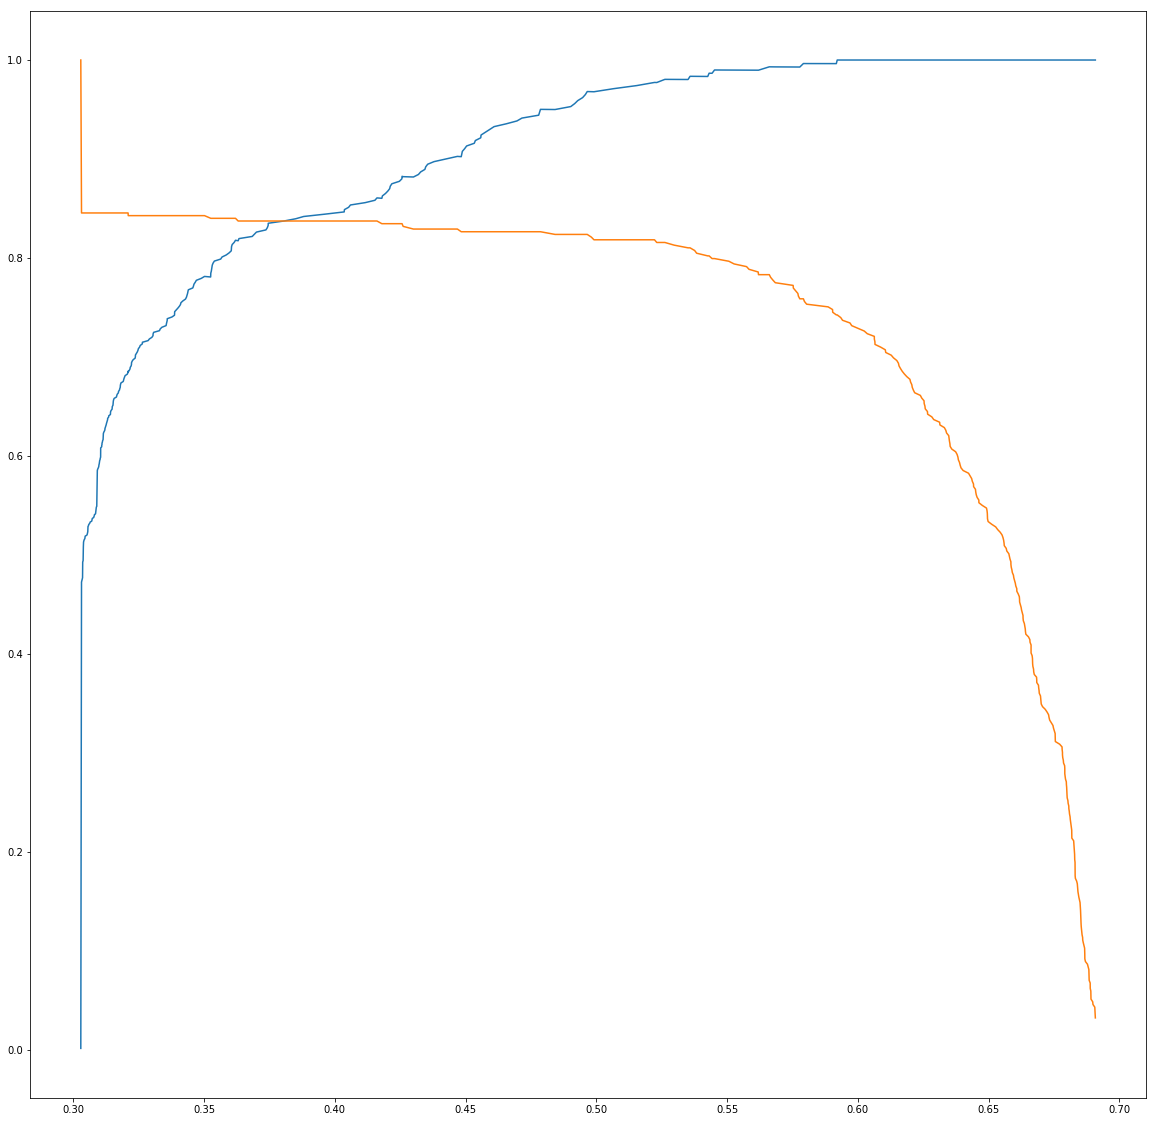

In [173]:
plt.plot(thresholds,precision[:-1])
plt.plot(thresholds,recall[:-1])
plt.show()

In [174]:
# Test data prediction probablities
y_test_pred_probs=xgbc_final.predict_proba(X_test_pt)[:,1]
prediction=pd.DataFrame(y_test_pred_probs,columns=["pred_probs"])
prediction.head()

,pred_probs
0,0.302875
1,0.302875
2,0.302875
3,0.302875
4,0.302875


In [177]:
prediction["class_predicted"]=prediction["pred_probs"].apply(lambda x: 1 if x> 0.38 else 0)

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction["class_predicted"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.84      0.80       123

    accuracy                           1.00     71202
   macro avg       0.88      0.92      0.90     71202
weighted avg       1.00      1.00      1.00     71202

